In [15]:
# Anatole Moureaux
# 29 Feb 2020

from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import *
from pymatgen.io.cif import *
from pymatgen.core.operations import *
from tabulate import tabulate
from pymatgen.symmetry.site_symmetries import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [16]:
#mission 4
print("Téléchargement du fichier CIF...")
structure = MPRester("H45GsyS7rpfkZzFI").get_structure_by_material_id("mp-9361")
CifWriter(structure,0.1, write_magmoms=False).write_file("RbLaS2_mp-9361_symmetrized.cif")
print("Téléchargement terminé !")

Téléchargement du fichier CIF...
Téléchargement terminé !


In [17]:
#mission 6
#liste des éléments de symétrie
customSym1 = SymmOp.from_xyz_string('-x, -y, -z')
customSym2 = SymmOp.from_xyz_string('-y, x-y, z')
customSym3 = SymmOp.from_xyz_string('y, -x+y, -z')

In [18]:
#3 différents atomes : 
Rb0 = [0.0,0.0,0.0]
La1 = [0.0,0.0,0.5]
S2 = [0.0,0.0,0.23]

In [19]:
#application des opérations
Rb0res = customSym1.operate(Rb0)
La1res = customSym2.operate(La1)
S2res = customSym3.operate(S2)

In [20]:
#affichage des résultats
print(tabulate([
	["("+str(customSym1.as_xyz_string()+")"),str(Rb0),str(Rb0res)],
	["("+str(customSym2.as_xyz_string()+")"),str(La1),str(La1res)],
	["("+str(customSym3.as_xyz_string()+")"),str(S2),str(S2res)]],
	headers=["Opération de symétrie","Atome de départ","Atome d'arrivée"]))

Opération de symétrie    Atome de départ    Atome d'arrivée
-----------------------  -----------------  -------------------
(-x, -y, -z)             [0.0, 0.0, 0.0]    [0. 0. 0.]
(-y, x-y, z)             [0.0, 0.0, 0.5]    [0.  0.  0.5]
(y, -x+y, -z)            [0.0, 0.0, 0.23]   [ 0.    0.   -0.23]


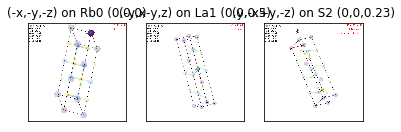

In [21]:
img1=mpimg.imread('op1.png')
img2=mpimg.imread('op2.png')
img3=mpimg.imread('op3.png')

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
ax1.imshow(img1)
ax1.set_title("(-x,-y,-z) on Rb0 (0,0,0)")
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.imshow(img2)
ax2.set_title("(-y,x-y,z) on La1 (0,0,0.5)")
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax3.imshow(img3)
ax3.set_title("(y,-x+y,-z) on S2 (0,0,0.23)")
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

plt.show()